In [11]:
import katdal
import numpy as np
import pickle

In [12]:
import time

In [13]:
np.set_printoptions(precision=1,suppress=True)

In [14]:
def target(h):
    h.catalogue.remove('Nothing')
    if len(h.catalogue) >0 :
        tgt=str(h.catalogue.targets[0])[0:12]
    else:
        tgt="Nothing:Bad DATA"
    return tgt

In [15]:
def get_ants(h):
    a_list=[]
    aa=h.file['TelescopeState']['cal_antlist']
    for i,ai in enumerate(aa):
        a_list.append(pickle.loads(ai[1]))
    a_array=np.array(a_list)
    labels=a_array[0]
    return labels

In [16]:
def get_ut(f):
    nn=int(f[-13:-3])
    print nn
    ut=time.asctime(time.gmtime(nn))
    return ut

In [17]:
def phases(h):
    g = h.file['TelescopeState']['cal_product_G']
    g_list = []
    for i, gi in enumerate(g):
        g_list.append(pickle.loads(gi[1]))
    g_array = np.array(g_list)
    HH=g_array[:,0,:]
    VV=g_array[:,1,:]
    HHbefore=np.rad2deg(np.angle(HH)[0])
    HHafter=np.rad2deg(np.angle(HH)[-1])
    VVbefore=np.rad2deg(np.angle(VV)[0])
    VVafter=np.rad2deg(np.angle(VV)[-1])
    return HHbefore, HHafter,VVbefore,VVafter

In [18]:
files=['/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/20/1484932819.h5',\
      '/var/kat/archive2/data/MeerKATAR1/telescope_products/2017/01/20/1484934307.h5']

In [19]:
Hphases=np.empty([10])
Vphases=np.empty([10])

In [20]:
for f in files:
    h=katdal.open(f)
    p=phases(h)
    print get_ut(f), f[-13:-3], target(h)
    print get_ants(h)
    labels=get_ants(h)
    print p[0],"\n",p[1],"\n\n",p[2],"\n",p[3]
    Hnew=np.vstack((Hphases,p[1]))
    Vnew=np.vstack((Vphases,p[3]))
    Hphases=Hnew
    Vphases=Vnew

1484932819
Fri Jan 20 17:20:19 2017 1484932819 PKS 0408-65 
['m006' 'm007' 'm008' 'm010' 'm015' 'm021' 'm022' 'm031' 'm062' 'm063']
[  0.   67.7  55.2  62.3  26.7  75.9  10.5  19.3  17.1  43.4] 
[  0.   65.8  91.8  50.3  48.1  87.   29.8  37.2  28.1  80.6] 

[  0.   19.1  63.4  23.6  23.1  62.3  -1.3 -64.7  51.2  12.4] 
[  0.   19.   97.5  18.9  35.1  88.3  32.8 -44.9  55.3  27.7]
1484934307
Fri Jan 20 17:45:07 2017 1484934307 PKS 0408-65 
['m006' 'm007' 'm008' 'm010' 'm015' 'm021' 'm022' 'm031' 'm062' 'm063']
[  0.   67.7  55.2  62.3  26.7  75.9  10.5  19.3  17.1  43.4] 
[  0.   65.6  95.6  59.6  23.9  65.6  30.6  20.1  60.4  73.1] 

[  0.   19.1  63.4  23.6  23.1  62.3  -1.3 -64.7  51.2  12.4] 
[   0.    20.3  103.8   21.    24.4   71.5   39.5  -56.    89.2   24.2]


In [21]:
labels=get_ants(h)

In [22]:
Hphases[1:]

array([[  0. ,  65.8,  91.8,  50.3,  48.1,  87. ,  29.8,  37.2,  28.1,
         80.6],
       [  0. ,  65.6,  95.6,  59.6,  23.9,  65.6,  30.6,  20.1,  60.4,
         73.1]])

In [23]:
Vphases[1:]

array([[   0. ,   19. ,   97.5,   18.9,   35.1,   88.3,   32.8,  -44.9,
          55.3,   27.7],
       [   0. ,   20.3,  103.8,   21. ,   24.4,   71.5,   39.5,  -56. ,
          89.2,   24.2]])

In [24]:
import matplotlib.pylab as plt
%matplotlib inline

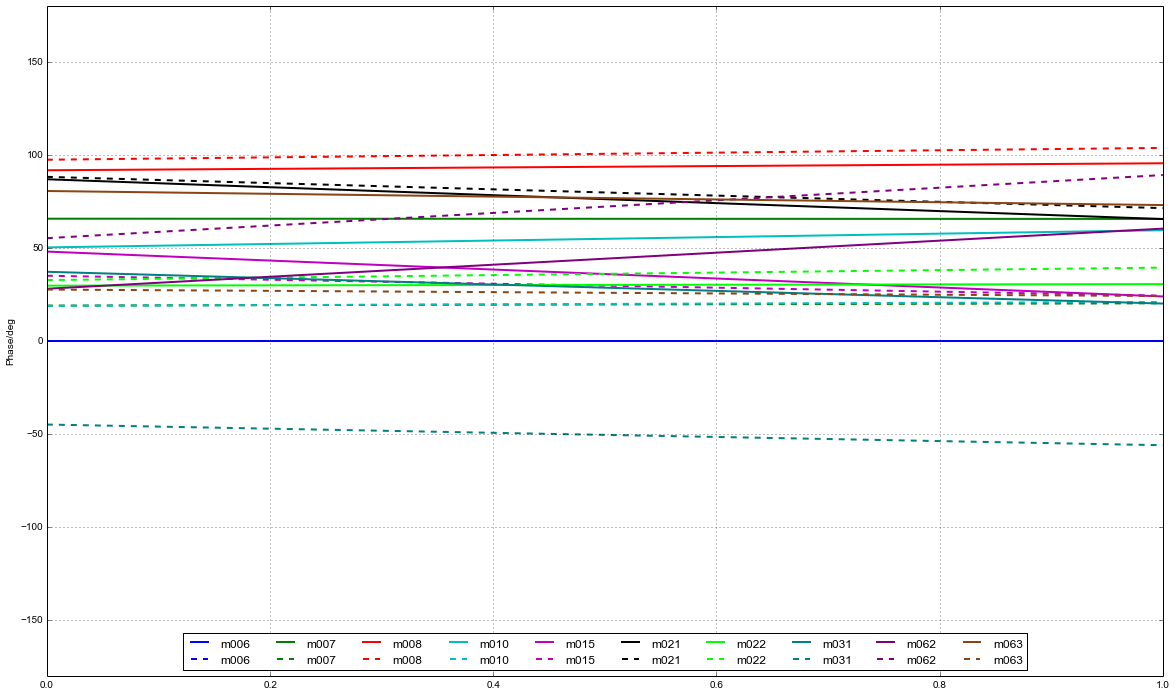

In [25]:
colors=['b','g','r','c','m','k','lime','teal','purple','saddlebrown','grey']
plt.figure(figsize=(20,12))
nants=len(labels)
plt.ylim([-180,180])

for i in range(len(labels)):
    plt.plot(Hphases[1:,i], label=labels[i],color=colors[i],linewidth=2)
    plt.plot(Vphases[1:,i], linestyle='--', label=labels[i],color=colors[i],linewidth=2)
plt.ylabel("Phase/deg")
#plt.xlabel("Time Offset/hours")
plt.legend(loc='lower center',ncol=nants)
plt.grid()